# This project includes image data generator to get the images from the dataset horse_or_human. These images are then rescaled before training with a convolutional neural network. Finally the neural network will predict any test image based on the training and evaluate the model based on accuracy

### Import the libraries

In [20]:
import numpy as np


### Download the human_or_horse dataset for training and validation

In [1]:
# Training images
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
# Validation images
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-04-29 11:30:38--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 172.253.123.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   129MB/s    in 1.1s    

2024-04-29 11:30:39 (129 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2024-04-29 11:30:40--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 172.253.123.207, 142.250.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

### Unzip the zip file using zipfile module

In [2]:
import zipfile
# Unzip training data
local_zip_train = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip_train, 'r')
zip_ref.extractall('./horse_or_human')
zip_ref.close()

# Unzip validation data
local_zip_val = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip_val, 'r')
zip_ref.extractall('./validation_horse_or_human')
zip_ref.close()

### Define the training directories for both horses and humans

In [5]:
import os

train_horse_dir = os.path.join('./horse_or_human/horses')
train_human_dir = os.path.join('./horse_or_human/humans')

val_horse_dir = os.path.join('./validation_horse_or_human/horses')
val_human_dir = os.path.join('./validation_horse_or_human/humans')

In [7]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(val_horse_dir)
validation_human_names = os.listdir(val_human_dir)

print(train_horse_names[:5], f'Total Files: {len(train_horse_names)}')
print(train_human_names[:5], f'Total Files: {len(train_human_names)}')
print(validation_horse_names[:5], f'Total Files: {len(validation_horse_names)}')
print(validation_human_names[:5], f'Total Files: {len(validation_human_names)}')

['horse33-5.png', 'horse45-3.png', 'horse48-5.png', 'horse29-9.png', 'horse36-7.png'] Total Files: 500
['human13-25.png', 'human13-21.png', 'human10-17.png', 'human17-21.png', 'human01-04.png'] Total Files: 527
['horse3-584.png', 'horse4-232.png', 'horse5-360.png', 'horse6-198.png', 'horse6-161.png'] Total Files: 128
['valhuman02-11.png', 'valhuman04-18.png', 'valhuman02-03.png', 'valhuman02-21.png', 'valhuman04-05.png'] Total Files: 128


### Display some images from the training set

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

print(next_horse_pic);
print(next_human_pic);

['./horse_or_human/horses/horse33-5.png', './horse_or_human/horses/horse45-3.png', './horse_or_human/horses/horse48-5.png', './horse_or_human/horses/horse29-9.png', './horse_or_human/horses/horse36-7.png', './horse_or_human/horses/horse18-9.png', './horse_or_human/horses/horse04-4.png', './horse_or_human/horses/horse01-5.png']
['./horse_or_human/humans/human13-25.png', './horse_or_human/humans/human13-21.png', './horse_or_human/humans/human10-17.png', './horse_or_human/humans/human17-21.png', './horse_or_human/humans/human01-04.png', './horse_or_human/humans/human17-14.png', './horse_or_human/humans/human01-19.png', './horse_or_human/humans/human14-26.png']


<Figure size 1600x1600 with 0 Axes>

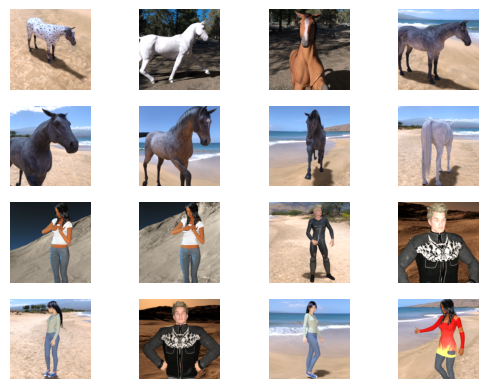

In [10]:
for i, img_path in enumerate(next_horse_pic+next_human_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Build a model

In [11]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
    # The first convolution layer
    keras.layers.Conv2D(16,(3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    # The second convolution layer
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # The third convolution
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # The flatten layer
    keras.layers.Flatten(),
    # The dense layer
    keras.layers.Dense(512, activation=tf.nn.relu),
    # The output layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

### Compile the model with RMSprop optimizer

In [12]:
from tensorflow import keras
from keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=[keras.metrics.Accuracy()])

### Process the image data with ImageDataGenerator

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) #rescale the upcoming image, meaning normalization

train_generator = train_datagen.flow_from_directory(
    './horse_or_human', #directory for the source images
    target_size=(300,300), #length and width of the images
    batch_size=128,
    class_mode='binary'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    './validation_horse_or_human', #directory for the source images
    target_size=(300,300), #length and width of the images
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training the neural network

In [14]:
history = model.fit(train_generator,
                    steps_per_epoch = 8,
                    epochs = 8,
                    verbose=1,
                    validation_data = val_generator,
                    validation_steps=8)

Epoch 1/8
8/8 [==============================] - 111s 16s/step - loss: 0.7108 - accuracy: 0.0000e+00 - val_loss: 0.6851 - val_accuracy: 0.0000e+00
Epoch 2/8
8/8 [==============================] - 99s 12s/step - loss: 0.7244 - accuracy: 0.0000e+00 - val_loss: 0.6819 - val_accuracy: 0.0000e+00
Epoch 3/8
8/8 [==============================] - 98s 12s/step - loss: 0.6724 - accuracy: 0.0000e+00 - val_loss: 0.6181 - val_accuracy: 0.0000e+00
Epoch 4/8
8/8 [==============================] - 98s 12s/step - loss: 0.7248 - accuracy: 0.0022 - val_loss: 0.5661 - val_accuracy: 0.0000e+00
Epoch 5/8
8/8 [==============================] - 102s 12s/step - loss: 0.5436 - accuracy: 0.0000e+00 - val_loss: 0.4015 - val_accuracy: 0.0000e+00
Epoch 6/8
8/8 [==============================] - 109s 12s/step - loss: 0.4604 - accuracy: 0.0067 - val_loss: 0.5286 - val_accuracy: 0.0000e+00
Epoch 7/8
8/8 [==============================] - 97s 14s/step - loss: 0.2150 - accuracy: 0.0022 - val_loss: 0.5411 - val_accuracy

### Predict images by uploading

In [38]:
import numpy as np
from google.colab import files
from keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

### Visualizing evolution of image through each convolution layer

1/1 [==============================] - 0s 193ms/step


<ipython-input-39-3198fef187a9>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-39-3198fef187a9>:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


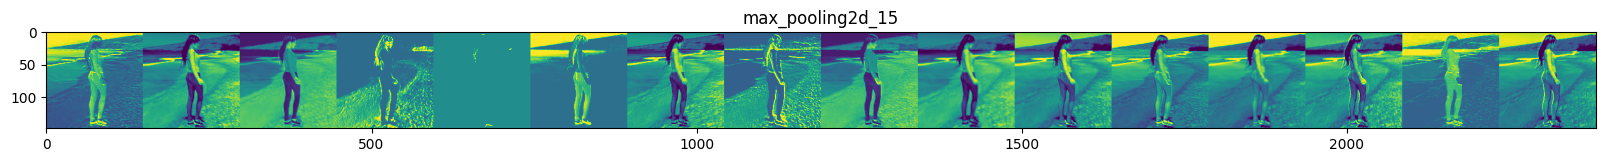

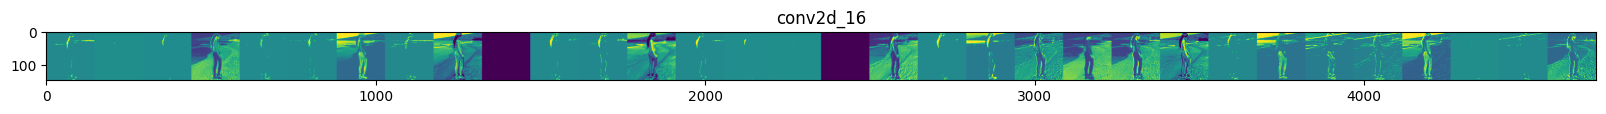

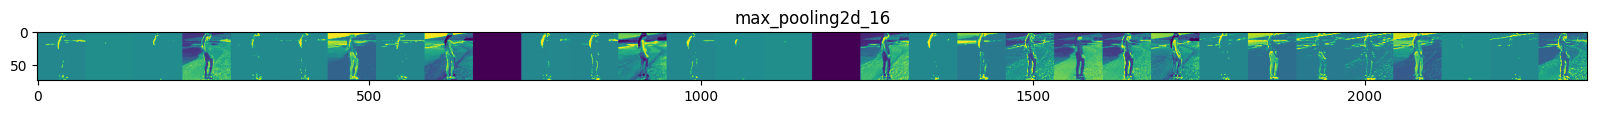

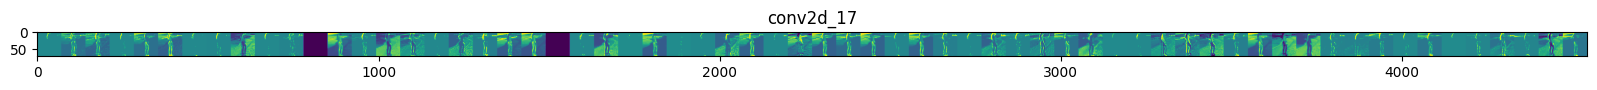

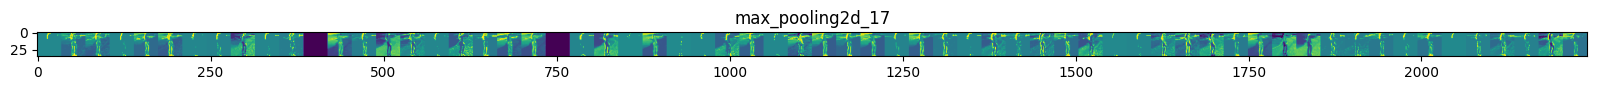

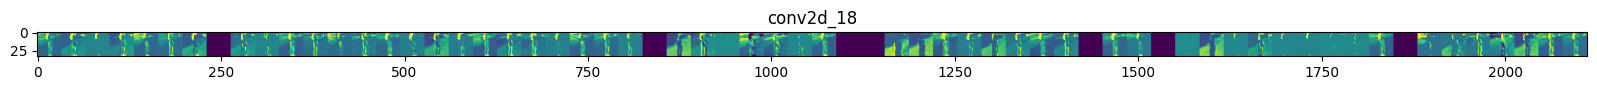

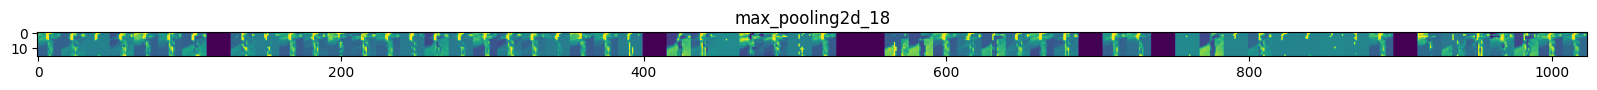

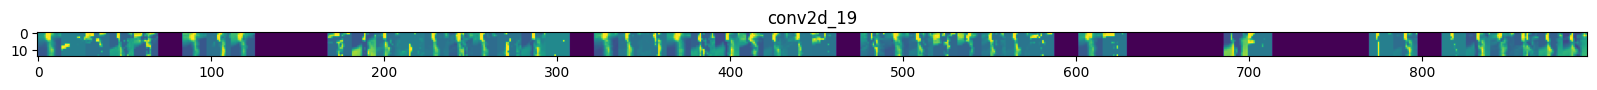

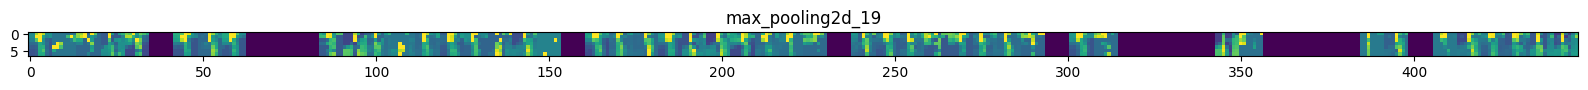

In [39]:
import numpy as np
import random
from keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [40]:
from google.colab import runtime
runtime.unassign()